In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('MissingMigrantsGlobal.csv',sep="\t",encoding='latin1')
df.head()

,Web ID,Region of Incident,Reported Date,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Location Description,Information Source,Location Coordinates,Migration Route,URL,UNSD Geographical Grouping,Source Quality
0,51591,Mediterranean,"March 28, 2019",2019,Mar,NaN,2.0,2,36.0,NaN,2.0,NaN,Presumed drowning,"Off the coast of Chios, Greece",Hellenic Coast Guard via IOM Greece,"38.362368696592, 26.172509473654",Eastern Mediterranean,NaN,Uncategorized,5
1,51588,Mediterranean,"March 26, 2019",2019,Mar,4.0,NaN,4,11.0,3.0,NaN,1.0,Presumed drowning,"Off the coast of Ayvac?k district, Çanakkale p...",Turkish Coast Guard via IOM Turkey,"39.441975591614, 26.378816195919",Eastern Mediterranean,http://bit.ly/2YmiPAN,Uncategorized,5
2,51589,Mediterranean,"March 26, 2019",2019,Mar,1.0,NaN,1,NaN,NaN,NaN,NaN,Presumed drowning,"Body recovered on Playa del Tarajal, Ceuta, Sp...","Ceuta al día, El Pueblo de Ceuta","35.871901875921, -5.343037665842",Western Mediterranean,"http://bit.ly/2uyj7qO, http://bit.ly/2uwj5zC",Uncategorized,3
3,51590,Mediterranean,"March 26, 2019",2019,Mar,1.0,NaN,1,NaN,NaN,NaN,NaN,Presumed drowning,"Body recovered on beach near Tetouan, Morocco ...",El Pueblo de Ceuta,"35.635115912988, -5.275650103548",Western Mediterranean,http://bit.ly/2uwj5zC,Uncategorized,1
4,51587,Central America,"March 25, 2019",2019,Mar,1.0,NaN,1,NaN,NaN,1.0,NaN,Fall from train,"Train tracks in Teacalco, Tlaxcala, Mexico","Megalópolis, Línea de contraste","19.334475177429, -98.069823987538",NaN,"http://bit.ly/2uvDIvH, http://bit.ly/2TXAFLS",Central America,3


In [3]:
df.shape

(5333, 20)

In [4]:
df.columns

Index(['Web ID', 'Region of Incident', 'Reported Date', 'Reported Year',
       'Reported Month', 'Number Dead', 'Minimum Estimated Number of Missing',
       'Total Dead and Missing', 'Number of Survivors', 'Number of Females',
       'Number of Males', 'Number of Children', 'Cause of Death',
       'Location Description', 'Information Source', 'Location Coordinates',
       'Migration Route', 'URL', 'UNSD Geographical Grouping',
       'Source Quality'],
      dtype='object')

In [5]:
#Top ten region of incidents
df["Region of Incident"].value_counts()[:10]

US-Mexico Border      1337
North Africa          1239
Mediterranean          984
Sub-Saharan Africa     475
Central America        309
Europe                 249
Horn of Africa         235
Middle East            164
South Asia             151
Southeast Asia          96
Name: Region of Incident, dtype: int64

In [6]:
#female male children percetange in top ten region of incident
person = df.groupby('Region of Incident')
df_1 = person[['Number of Males','Number of Females','Number of Children']].count().sort_values(ascending =False,by=('Number of Males'))[:10]
df_1

,Number of Males,Number of Females,Number of Children
Region of Incident,,,
US-Mexico Border,942,89,20
Mediterranean,374,256,235
North Africa,338,200,107
Sub-Saharan Africa,296,150,107
Central America,252,26,25
Europe,196,27,30
South Asia,130,15,15
Middle East,103,37,43
Horn of Africa,77,25,13


In [7]:
# females =person['Number of Females'].count().sort_values(ascending =False)[:10]
# females

total = (df_1['Number of Males']+df_1['Number of Females']+df_1['Number of Children'])/100
percentage = df_1.transpose()/total

In [8]:
data = percentage.T
data

,Number of Males,Number of Females,Number of Children
Region of Incident,,,
US-Mexico Border,89.628925,8.468126,1.902950
Mediterranean,43.236994,29.595376,27.167630
North Africa,52.403101,31.007752,16.589147
Sub-Saharan Africa,53.526221,27.124774,19.349005
Central America,83.168317,8.580858,8.250825
Europe,77.470356,10.671937,11.857708
South Asia,81.250000,9.375000,9.375000
Middle East,56.284153,20.218579,23.497268
Horn of Africa,66.956522,21.739130,11.304348


<AxesSubplot:ylabel='Number of Males'>

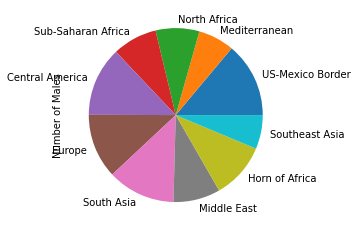

In [9]:
data["Number of Males"].plot(kind='pie')

In [10]:
df.columns

Index(['Web ID', 'Region of Incident', 'Reported Date', 'Reported Year',
       'Reported Month', 'Number Dead', 'Minimum Estimated Number of Missing',
       'Total Dead and Missing', 'Number of Survivors', 'Number of Females',
       'Number of Males', 'Number of Children', 'Cause of Death',
       'Location Description', 'Information Source', 'Location Coordinates',
       'Migration Route', 'URL', 'UNSD Geographical Grouping',
       'Source Quality'],
      dtype='object')

In [11]:
df['Information Source'].value_counts()[:10]

Mixed Migration Monitoring Mechanism Initiative (4Mi)    960
Mixed Migration Monitoring Mechanism Initiative (4mi)    706
Pima County Office of the Medical Examiner               681
MHub                                                     190
IOM Libya                                                111
Syrian Observatory for Human Rights                       96
IOM Afghanistan                                           92
IOM Italy                                                 90
UNHCR                                                     62
South Texas Human Rights Center                           46
Name: Information Source, dtype: int64

In [19]:
source = df.groupby('Region of Incident')
ser = pd.Series()
for region ,df_temp in source:
    print(region,df_temp['Information Source'].value_counts()[:1])

Caribbean Dominican Today    3
Name: Information Source, dtype: int64
Central America Debate    6
Name: Information Source, dtype: int64
Central Asia Reuters, EurasiaNet, Asia News    1
Name: Information Source, dtype: int64
East Asia Taiwan Coast Guard Administration, VN Express, BBC Vietnamese    1
Name: Information Source, dtype: int64
Europe Calais Migrant Solidarity    13
Name: Information Source, dtype: int64
Horn of Africa Mixed Migration Monitoring Mechanism Initiative (4Mi)    130
Name: Information Source, dtype: int64
Mediterranean IOM Libya    102
Name: Information Source, dtype: int64
Middle East Syrian Observatory for Human Rights    96
Name: Information Source, dtype: int64
North Africa Mixed Migration Monitoring Mechanism Initiative (4Mi)    674
Name: Information Source, dtype: int64
North America CBC    1
Name: Information Source, dtype: int64
South America O Liberal    2
Name: Information Source, dtype: int64
South Asia IOM Afghanistan    92
Name: Information Source, d

C:\Users\kumaw\AppData\Local\Temp\ipykernel_13076\2909503827.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ser = pd.Series()


In [20]:
source = df.groupby('Region of Incident')
source['Information Source'].value_counts().head(1)


Region of Incident  Information Source
Caribbean           Dominican Today       3
Name: Information Source, dtype: int64

In [23]:
#most common cause of death
df['Cause of Death'].value_counts().head(10)

Drowning                                    968
Sickness and lack of access to medicines    757
Unknown                                     549
Unknown (skeletal remains)                  469
Vehicle Accident                            444
Presumed drowning                           347
Shot                                        171
Dehydration                                 121
Starvation                                   89
Hypothermia                                  79
Name: Cause of Death, dtype: int64

In [41]:
df[df['Reported Year']==2019]["Reported Month"].value_counts()

Jan    57
Feb    51
Mar    35
Name: Reported Month, dtype: int64

In [47]:
df['Migration Route'].value_counts()[:10]#top migration routes

Central America to US       1507
Central Mediterranean        499
Western Mediterranean        255
Eastern Mediterranean        230
Western Balkans               64
Calais to United Kingdom      51
Western African               15
Horn Africa to Yemen          15
Italy to France                9
Darien Gap                     7
Name: Migration Route, dtype: int64

In [56]:
df_x = pd.DataFrame(df.groupby('Reported Year')['Web ID'].count())
df_x

,Web ID
Reported Year,
2014,245
2015,808
2016,1275
2017,1356
2018,1506
2019,143


,Web ID
Reported Year,
2014,245
2015,808
2016,1275
2017,1356
2018,1506
2019,143


In [ ]:
#how to rename a columns